In [2]:
import matplotlib.pyplot as plt
from skimage import io, color, morphology
import numpy as np


In [3]:
def get_image(path):
    return io.imread(path)

def convert_rgb2hsv(image_rgb):
    image_hsv = color.rgb2hsv(image_rgb)
    return image_hsv

def create_mask(image_hsv, lower_green, upper_green):
    mask = (image_hsv[:, :, 0] >= lower_green[0]) & (image_hsv[:, :, 0] <= upper_green[0]) & \
        (image_hsv[:, :, 1] >= lower_green[1]) & (image_hsv[:, :, 1] <= upper_green[1]) & \
        (image_hsv[:, :, 2] >= lower_green[2]) & (image_hsv[:, :, 2] <= upper_green[2])
    return mask

def print_raw_and_extracted(imag_raw, extracted_extracted):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    ax[0].imshow(imag_raw)
    ax[0].set_title("Image originale")
    ax[0].axis('off')

    ax[1].imshow(extracted_extracted)
    ax[1].set_title("Image après extraction")
    ax[1].axis('off')

    plt.show()


# TEST 1 - Extraction d'une feuille sur fond blanc

Méthode : utilisation de seuil (ie. pas de convolution pour le moment)

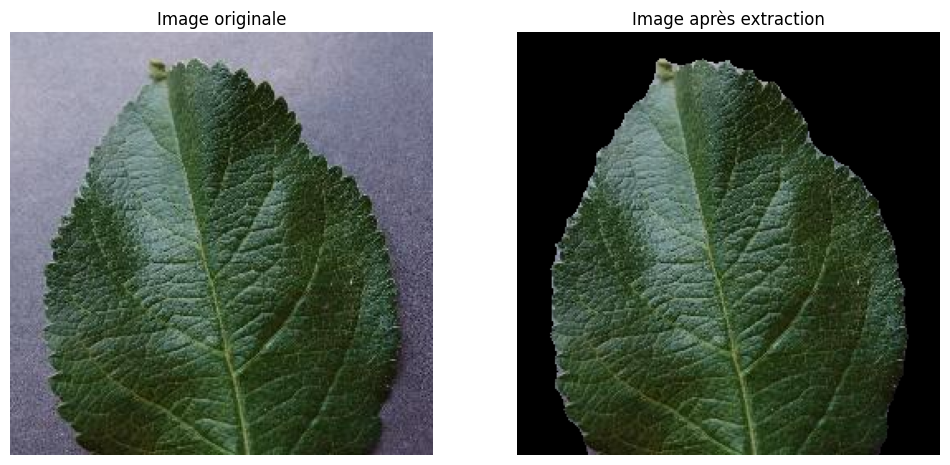

In [7]:
# Charger l'image
path = 'D:/3A/Projet immersif/database/feuille.jfif'
imag_rgb = get_image(path)

# Convertir l'image de l'espace RGB à l'espace HSV
image_hsv = convert_rgb2hsv(imag_rgb)

# On défini des seuils de verts pour l'extraction de contours
       # A termes il faut trouver un moyen pour ces seuils se règlent automatiquement
lower_green = np.array([0.08, 0.08, 0.08])
upper_green = np.array([0.5, 1.0, 1.0])

# On crée un mask basé sur ces seuils
mask = create_mask(image_hsv, lower_green, upper_green)

# Les reflets de la lumière ou une mauvaise qualité d'image peuvent induire des artefacts apèrs l'utilisation d'un mask
# Pour éviter ce problème on utilise la fonction suivante qui va remplir les "trous" dans l'objet après l'utilisation du mask
cleaned_mask = morphology.closing(mask, morphology.disk(10))

# On applique le mask (et la correction) sur l'image pour garder uniquement les pixels verts qui nous intéressent 
extracted_leaf = np.zeros_like(imag_rgb)
extracted_leaf[cleaned_mask] = imag_rgb[cleaned_mask]

# Afficher l'image originale et la feuille extraite
print_raw_and_extracted(imag_rgb, extracted_leaf)
